In [12]:
import pandas as pd
from data_tool import download_binance_minute_data

In [2]:
# 创建对象
s = pd.Series(range(10, 20))

In [3]:
s

0    10
1    11
2    12
3    13
4    14
5    15
6    16
7    17
8    18
9    19
dtype: int64

In [4]:
s.index

RangeIndex(start=0, stop=10, step=1)

In [5]:
s.values

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [6]:
s > 5

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
dtype: bool

In [7]:
s > 15

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7     True
8     True
9     True
dtype: bool

In [8]:
s[s > 15]

6    16
7    17
8    18
9    19
dtype: int64

In [9]:
# 自定义标签
s2 = pd.Series([29, 20, 35], index=["shanghai", "beijing", "shenzhen"])

In [10]:
# 查看 s2
s2

shanghai    29
beijing     20
shenzhen    35
dtype: int64

In [11]:

# 获取 "shanghai" 对应的值
s2["shanghai"]

np.int64(29)

In [13]:
bar_data = download_binance_minute_data("BTCUSDT", "20250901", "20250902")

2025-09-01 00:00:00+08:00 2025-09-01 16:39:00+08:00
2025-09-01 16:39:00+08:00 2025-09-02 00:00:00+08:00


In [14]:
df = pd.DataFrame.from_records([bar.__dict__ for bar in bar_data])

In [15]:
df

,gateway_name,symbol,exchange,datetime,interval,volume,turnover,open_interest,open_price,high_price,low_price,close_price,vt_symbol
0,BINANCE,BTCUSDT,Exchange.BINANCE,2025-09-01 00:00:00+08:00,Interval.MINUTE,16.43799,0,0,108818.69,108818.69,108787.20,108787.20,BTCUSDT.BINANCE
1,BINANCE,BTCUSDT,Exchange.BINANCE,2025-09-01 00:01:00+08:00,Interval.MINUTE,13.57550,0,0,108787.20,108789.45,108763.75,108767.22,BTCUSDT.BINANCE
2,BINANCE,BTCUSDT,Exchange.BINANCE,2025-09-01 00:02:00+08:00,Interval.MINUTE,8.92939,0,0,108767.22,108767.22,108734.82,108751.60,BTCUSDT.BINANCE
3,BINANCE,BTCUSDT,Exchange.BINANCE,2025-09-01 00:03:00+08:00,Interval.MINUTE,8.75426,0,0,108751.60,108751.60,108698.50,108711.38,BTCUSDT.BINANCE
4,BINANCE,BTCUSDT,Exchange.BINANCE,2025-09-01 00:04:00+08:00,Interval.MINUTE,4.38150,0,0,108711.37,108711.38,108700.00,108711.00,BTCUSDT.BINANCE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,BINANCE,BTCUSDT,Exchange.BINANCE,2025-09-01 23:56:00+08:00,Interval.MINUTE,1.81247,0,0,108683.47,108760.00,108683.47,108760.00,BTCUSDT.BINANCE
1437,BINANCE,BTCUSDT,Exchange.BINANCE,2025-09-01 23:57:00+08:00,Interval.MINUTE,4.12213,0,0,108760.00,108780.00,108750.91,108750.91,BTCUSDT.BINANCE
1438,BINANCE,BTCUSDT,Exchange.BINANCE,2025-09-01 23:58:00+08:00,Interval.MINUTE,2.99336,0,0,108750.92,108750.92,108728.51,108748.26,BTCUSDT.BINANCE
1439,BINANCE,BTCUSDT,Exchange.BINANCE,2025-09-01 23:59:00+08:00,Interval.MINUTE,2.71941,0,0,108748.26,108784.33,108748.26,108784.33,BTCUSDT.BINANCE


In [17]:
# 基于多个列表的创建
dts = []
open_prices = []
high_prices = []
low_prices = []
close_prices = []

for bar in bar_data:
    dts.append(bar.datetime)
    open_prices.append(bar.open_price)
    high_prices.append(bar.high_price)
    low_prices.append(bar.low_price)
    close_prices.append(bar.close_price)

df2 = pd.DataFrame(dict(open=open_prices, high=high_prices, low=low_prices, close=close_prices), index=dts)

In [18]:
df2

,open,high,low,close
2025-09-01 00:00:00+08:00,108818.69,108818.69,108787.20,108787.20
2025-09-01 00:01:00+08:00,108787.20,108789.45,108763.75,108767.22
2025-09-01 00:02:00+08:00,108767.22,108767.22,108734.82,108751.60
2025-09-01 00:03:00+08:00,108751.60,108751.60,108698.50,108711.38
2025-09-01 00:04:00+08:00,108711.37,108711.38,108700.00,108711.00
...,...,...,...,...
2025-09-01 23:56:00+08:00,108683.47,108760.00,108683.47,108760.00
2025-09-01 23:57:00+08:00,108760.00,108780.00,108750.91,108750.91
2025-09-01 23:58:00+08:00,108750.92,108750.92,108728.51,108748.26
2025-09-01 23:59:00+08:00,108748.26,108784.33,108748.26,108784.33


In [19]:
# 查看头部数据
df2.head()

,open,high,low,close
2025-09-01 00:00:00+08:00,108818.69,108818.69,108787.20,108787.20
2025-09-01 00:01:00+08:00,108787.20,108789.45,108763.75,108767.22
2025-09-01 00:02:00+08:00,108767.22,108767.22,108734.82,108751.60
2025-09-01 00:03:00+08:00,108751.60,108751.60,108698.50,108711.38
2025-09-01 00:04:00+08:00,108711.37,108711.38,108700.00,108711.00


In [20]:
open_s = df2["open"]

In [21]:
open_s

2025-09-01 00:00:00+08:00    108818.69
2025-09-01 00:01:00+08:00    108787.20
2025-09-01 00:02:00+08:00    108767.22
2025-09-01 00:03:00+08:00    108751.60
2025-09-01 00:04:00+08:00    108711.37
                               ...    
2025-09-01 23:56:00+08:00    108683.47
2025-09-01 23:57:00+08:00    108760.00
2025-09-01 23:58:00+08:00    108750.92
2025-09-01 23:59:00+08:00    108748.26
2025-09-02 00:00:00+08:00    108784.33
Name: open, Length: 1441, dtype: float64

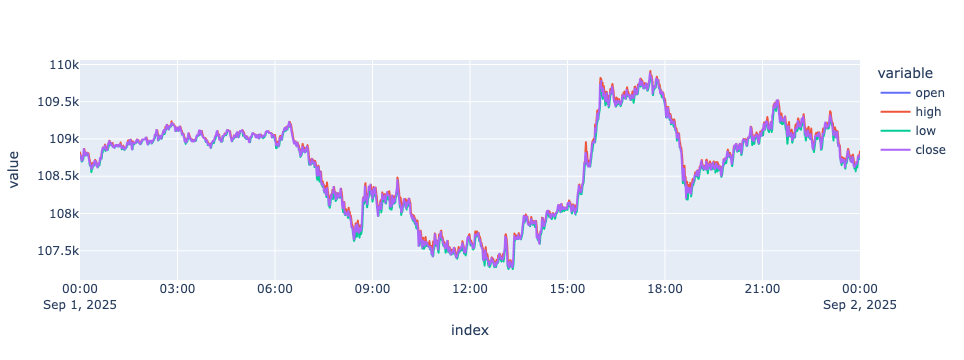

In [24]:
# 绘制折线图
import plotly.express as px
fig = px.line(df2)
fig.show()